<a href="https://colab.research.google.com/github/devingoldstein/QM2/blob/main/frenchdemandfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving FrenchDemand.csv to FrenchDemand.csv


In [2]:
from google.colab import files
uploaded = files.upload()

save_directory = "/content/finaldata"

# Create the directory if it doesn't exist
!mkdir -p $save_directory

# Iterate through the uploaded files
for filename, content in uploaded.items():
    # Specify the full file path
    file_path = f"{save_directory}/{filename}"

    # Write the file content to the specified path
    with open(file_path, "wb") as f:
        f.write(content)

    print(f"File '{filename}' saved to '{file_path}'")

Saving FrenchDemand.csv to FrenchDemand (1).csv
File 'FrenchDemand (1).csv' saved to '/content/finaldata/FrenchDemand (1).csv'


In [4]:
import pandas

import matplotlib
%matplotlib inline

data = pandas.read_csv('/content/finaldata/FrenchDemand (1).csv')
data.head()

,Country,Managers,Professionals,Technicians,Clerical,Service,Agriculture,Craft,Plant,Elementary,National Average
0,Austria,0.086,0.036,0.265,0.075,0.137,0.0,0.149,0.099,0.071,0.118
1,Bulgaria,0.020,0.433,0.689,0.083,0.075,0.0,0.109,0.019,0.122,0.295
2,Croatia,0.338,0.165,50.007,0.366,3.069,0.0,0.113,0.103,0.106,15.096
3,Cyprus,0.120,0.142,0.349,0.000,0.125,0.0,0.000,0.000,0.186,0.159
4,Czech Republic,0.005,0.667,0.670,0.021,0.016,0.0,0.010,2.821,0.009,0.638


In [5]:
#cleaning the data

import pandas as pd
import numpy as np

df = pd.read_csv('/content/finaldata/FrenchDemand (1).csv')

clean = df.replace(',', '', regex=True)
clean.iloc[:, 1:] = clean.iloc[:, 1:].replace('-', np.nan, regex=True).astype(float)

clean.head()

,Country,Managers,Professionals,Technicians,Clerical,Service,Agriculture,Craft,Plant,Elementary,National Average
0,Austria,0.086,0.036,0.265,0.075,0.137,0.0,0.149,0.099,0.071,0.118
1,Bulgaria,0.020,0.433,0.689,0.083,0.075,0.0,0.109,0.019,0.122,0.295
2,Croatia,0.338,0.165,50.007,0.366,3.069,0.0,0.113,0.103,0.106,15.096
3,Cyprus,0.120,0.142,0.349,0.000,0.125,0.0,0.000,0.000,0.186,0.159
4,Czech Republic,0.005,0.667,0.670,0.021,0.016,0.0,0.010,2.821,0.009,0.638


<ipython-input-6-638e67d97478>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


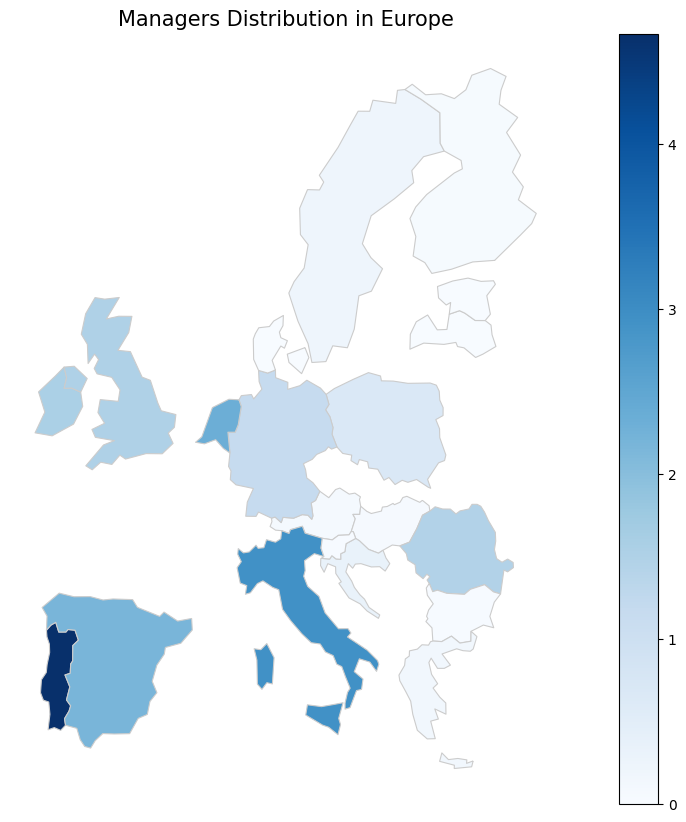

In [ ]:
#creating Chloropleth map
!pip install geopandas matplotlib
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']
europe.to_file("europe.geojson", driver='GeoJSON')

merged_data = europe.merge(clean, left_on='name', right_on='Country')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Managers', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize plot
ax.set_title('Managers Distribution in Europe', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_axis_off()

plt.show()

In [ ]:
!pip install geopandas matplotlib plotly
import geopandas as gpd
import plotly.express as px

# Load GeoJSON data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

# Merge with your dataset
merged_data = europe.merge(clean, left_on='name', right_on='Country')

# Create an interactive choropleth map
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Managers',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='portland',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Managerial Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Managers'))

# Show the interactive map
fig.show()

<ipython-input-14-158e92a02ca0>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Professionals',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='phase',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Professional Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Professionals'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Technicians ',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='mint',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Technician Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Technicians'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Clerical',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='curl',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Clerical Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Clerical'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Service',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='bupu',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Service Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Service'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Agriculture ',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='bluered',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Agriculture Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Agriculture'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Craft',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='piyg',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Craft Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Craft'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Plant',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='orrd',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Plant Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Plant'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Elementary',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='magma',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Elementary Roles Demanding French Speakers', coloraxis_colorbar=dict(title='Elementary'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='National Average ',  # Replace with  desired column
                    hover_name='name',
                    hover_data={'National Average ':True,'Managers':True,'Professionals':True,'Technicians ':True,'Clerical':True,'Service':True,'Agriculture ':True,'Craft':True,'Plant':True,'Elementary':True},
                    color_continuous_scale='bluered',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Average Percentage of Jobs Demanding French Speakers', coloraxis_colorbar=dict(title='National Average'))

# Show the interactive map
fig.show()
fig.write_json('interactive_frenchdemand.json')

Unique countries before removal:
['austria' 'bulgaria' 'croatia' 'cyprus' 'czech republic' 'denmark'
 'estonia' 'eu' 'finland' 'germany' 'greece' 'hungary' 'ireland' 'italy'
 'latvia' 'lithuiania' 'luxembourg' 'malta' 'netherlands' 'oced' 'poland'
 'portugal' 'romania' 'slovak republic' 'slovenia' 'spain' 'sweden'
 'united kingdom']

Unique countries after removal:
['austria' 'bulgaria' 'croatia' 'cyprus' 'czech republic' 'denmark'
 'estonia' 'eu' 'finland' 'germany' 'greece' 'hungary' 'ireland' 'italy'
 'latvia' 'lithuiania' 'malta' 'netherlands' 'oced' 'poland' 'portugal'
 'romania' 'slovak republic' 'slovenia' 'spain' 'sweden' 'united kingdom']


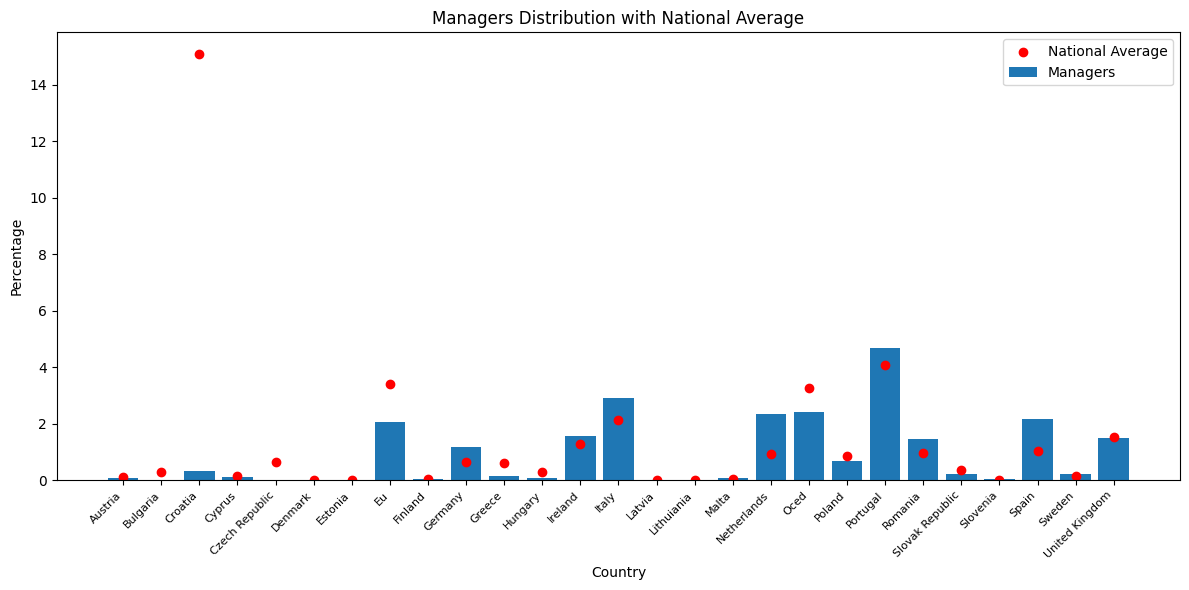

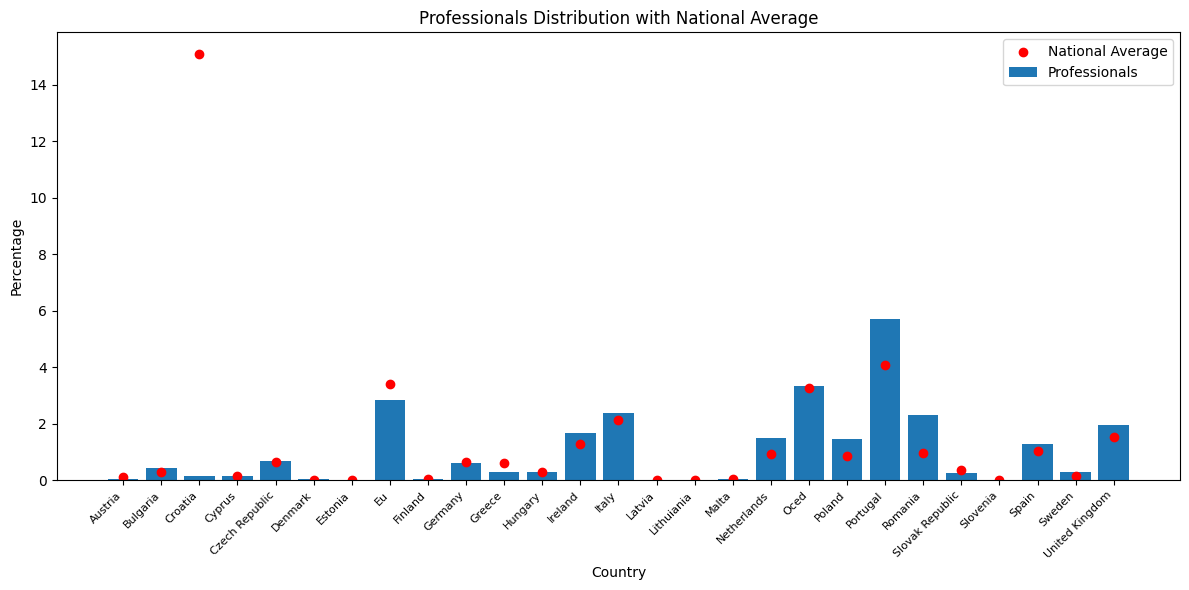

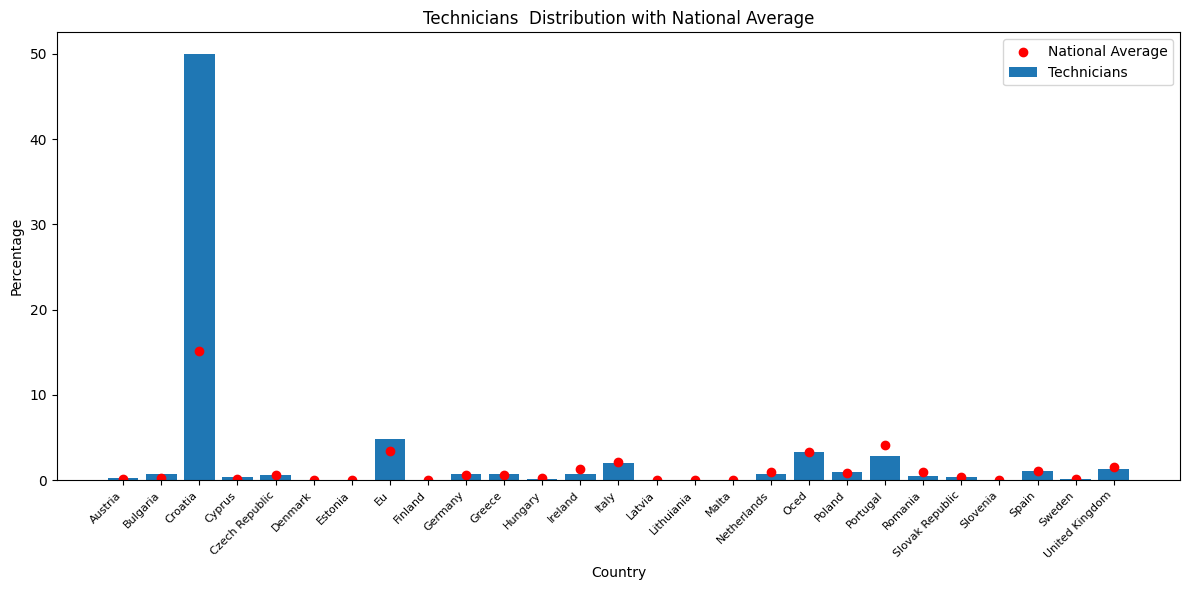

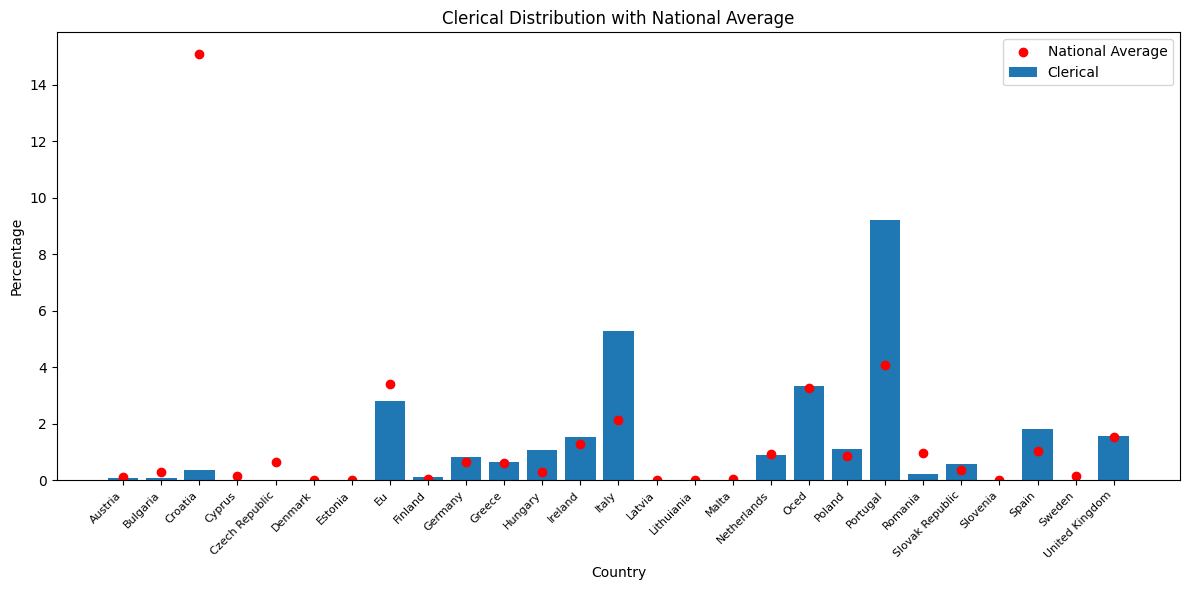

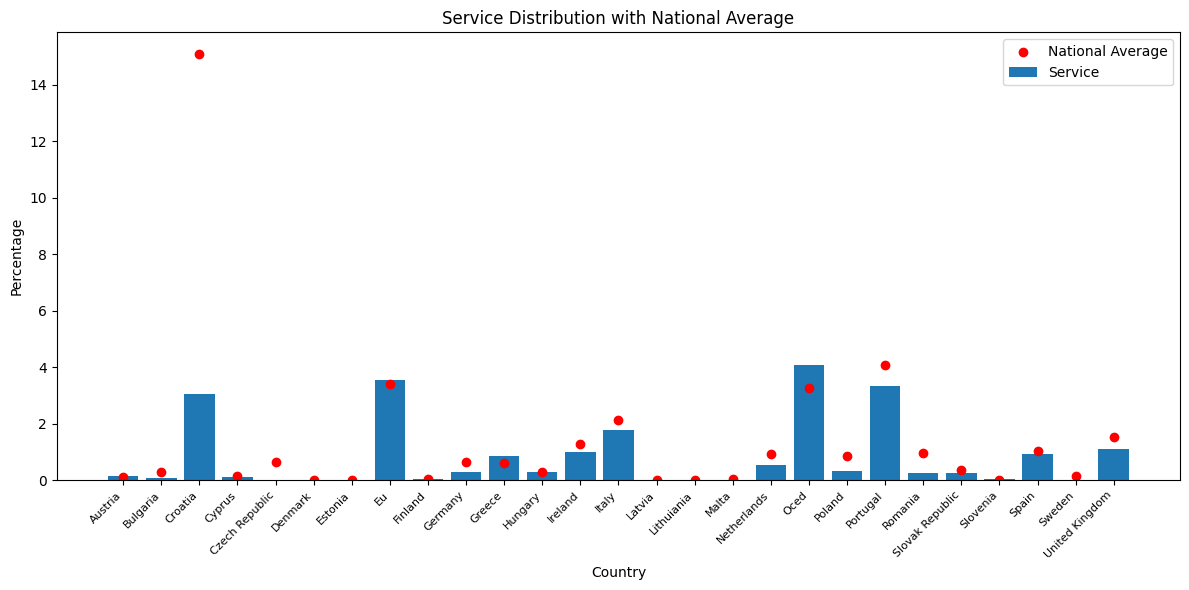

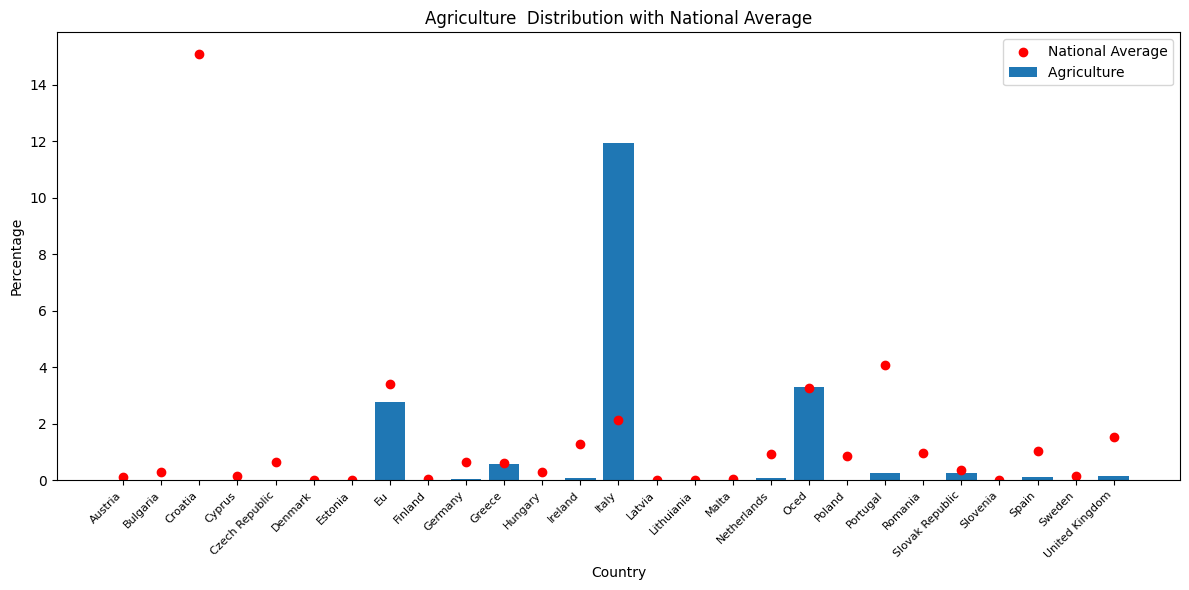

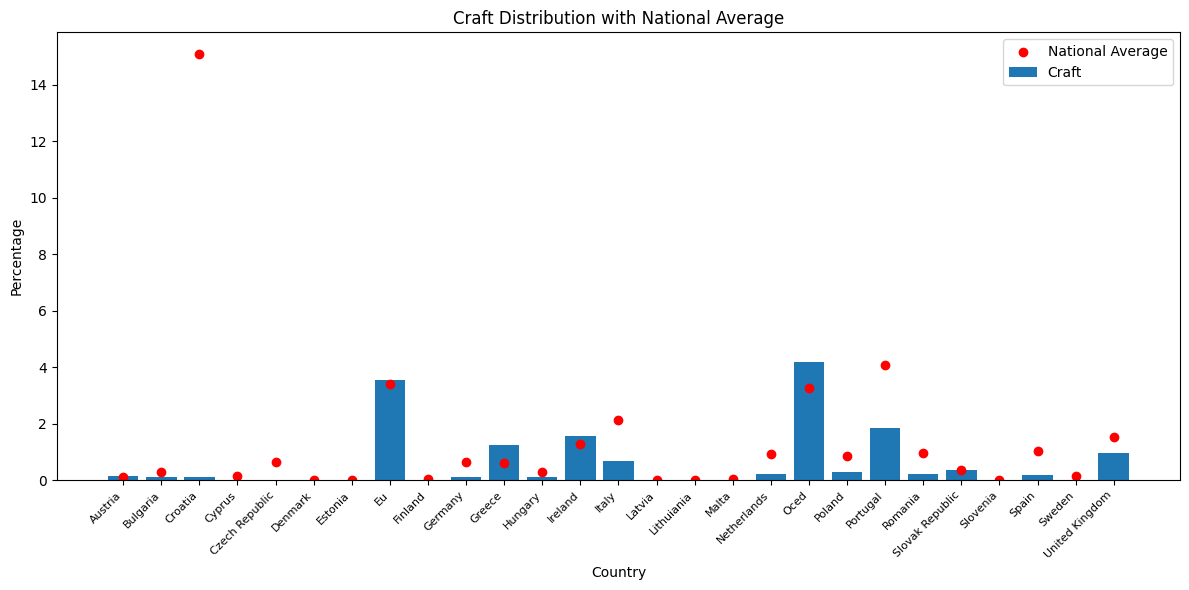

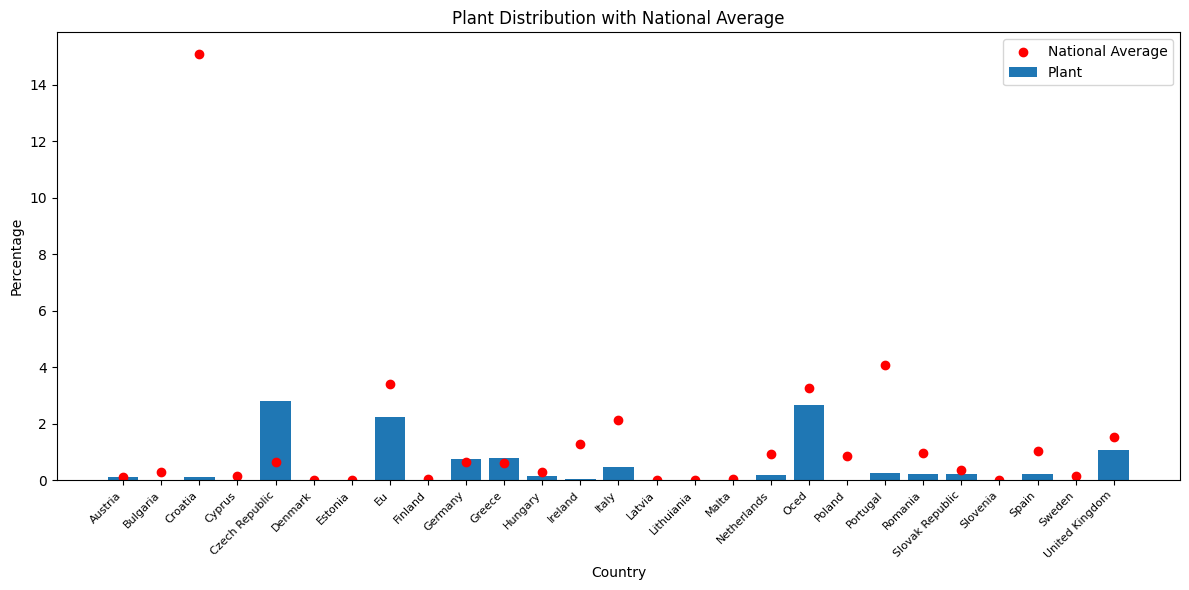

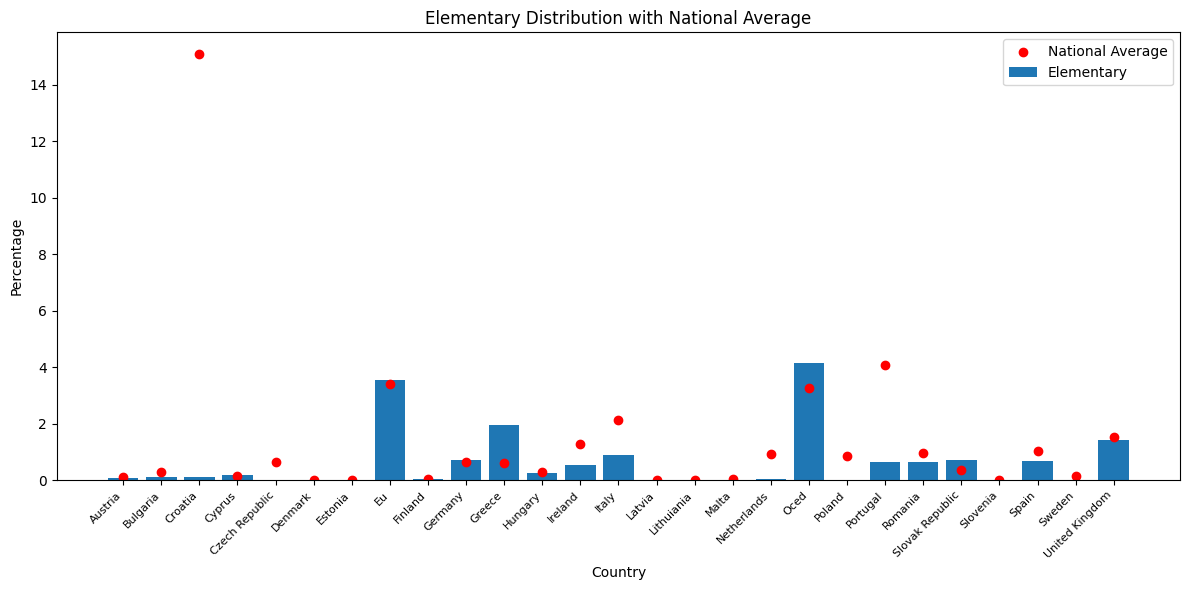

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'clean' is your data
data = clean

# Create DataFrame
dffrench = pd.DataFrame(data)

# Remove a specific country (e.g., Luxembourg)
country_to_remove = "luxembourg"

# Debugging: Print the unique values in the 'Country' column before removal
print("Unique countries before removal:")
print(dffrench['Country'].unique())

# Remove the specified country while preserving the original case
dffrench = dffrench[dffrench['Country'].str.strip() != country_to_remove]

# Debugging: Print the unique values in the 'Country' column after removal
print("\nUnique countries after removal:")
print(dffrench['Country'].unique())

# Plotting
occupation_titles = dffrench.columns[1:-2]  # Exclude 'Country' and 'National Average'
countries = dffrench['Country']

for occupation in occupation_titles:
    plt.figure(figsize=(12, 6))
    plt.bar(countries, dffrench[occupation], label=occupation)
    plt.scatter(countries, dffrench['National Average '], color='red', marker='o', label='National Average')
    plt.title(f'{occupation} Distribution with National Average')
    plt.xlabel('Country')
    plt.ylabel('Percentage')

    # Set smaller font size for x-axis labels
    plt.xticks(rotation=45, ha='right', fontsize=8)

    # Add this line to convert the first letter of each x-axis label to uppercase
    plt.xticks(countries, [country.title() for country in countries])

    plt.legend()
    plt.tight_layout()
    plt.show()